# Probability distributions for synthetic data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import sys
import math

# NOTES:
# 29 continuous and discrete distributions are taken into account.
# Multivariate distributions such as multivariate_hypergeometric, multivariate_normal, dirichlet, multinomial were discarded


def generate_synthetic_dataset(num_variables=100, size=10000, seed=None):
  """ returns a dataframe containing num_variables following
  different probability distributions implemented in numpy """

  def scale_vector(vector):
    if vector[vector == np.inf].any():
      vector[vector == np.inf] = sys.float_info.max
    if vector[vector == -np.inf].any():
      vector[vector == -np.inf] = sys.float_info.min
    minimum = vector.min()
    maximum = vector.max()
    if minimum != maximum:
      vector = vector - minimum
      return vector / (maximum - minimum)
    else:
      return vector / minimum

  distributions = []
  num_distributions = 29
  num_variables = 100
  variable_id = 0
  # These constants were defined to create valid parameter values for certain probability distributions
  MIN = 0.000001
  MAX = 10


  for i in range(num_variables):
    distribution_id = random.randint(1, num_distributions)
    variable_id += 1
    match distribution_id:

      case 1:
        # Draw samples from a Beta distribution.
        # beta(a, b[, size])
        a, b = random.uniform(MIN, MAX), random.uniform(MIN, MAX)
        name = str(variable_id)+ ":" +  "beta" + ":a=" + str("%.2f" % a) + ":b=" + str("%.2f" % b)
        distributions.append([name, scale_vector(np.random.beta(a, b, size))])

      case 2:
        # Discrete
        # Draw samples from a binomial distribution.
        # binomial(n, p[, size])
        n, p = random.randint(1, MAX), random.uniform(0, 1)
        name = str(variable_id)+ ":" +  "binomial" + ":n=" + str(n) + ":p=" + str("%.2f" % p)
        distributions.append([name, scale_vector(np.random.binomial(n, p, size))])

      case 3:
        # Draw samples from a chi-square distribution.
        # chisquare(df[, size])
        df = random.uniform(1, MAX)
        name = str(variable_id)+ ":" +  "chi-square" + ":df=" + str("%.2f" % df)
        distributions.append([name, scale_vector(np.random.chisquare(df, size))])

      case 4:
        # Draw samples from an exponential distribution.
        # exponential([scale, size])
        scale = random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "exponential" + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.exponential(scale, size))])

      case 5:
        # Draw samples from an F distribution.
        # f(dfnum, dfden[, size])
        dfnum, dfden = random.uniform(1, MAX), random.uniform(1, MAX)
        name = str(variable_id)+ ":" +  "f" + ":dfnum=" + str("%.2f" % dfnum) + ":dfden=" + str("%.2f" % dfden)
        distributions.append([name, scale_vector(np.random.f(dfnum, dfden, size))])

      case 6:
        # Draw samples from a Gamma distribution.
        # gamma(shape[, scale, size])
        shape, scale = random.uniform(0, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "gamma" + ":shape=" + str("%.2f" % shape) + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.gamma(shape, scale, size))])

      case 7:
        # Discrete
        # Draw samples from the geometric distribution.
        # geometric(p[, size])
        p = random.uniform(0, 1)
        name = str(variable_id)+ ":" +  "geometric" + ":p=" + str("%.2f" % p)
        distributions.append([name, scale_vector(np.random.geometric(p, size))])

      case 8:
        # Draw samples from a Gumbel distribution.
        # gumbel([loc, scale, size]
        loc, scale = random.uniform(0, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "gumbel" + ":loc=" + str("%.2f" % loc) + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.gumbel(loc, scale, size))])

      case 9:
        # Discrete
        # Draw samples from a Hypergeometric distribution.
        # hypergeometric(ngood, nbad, nsample[, size])
        ngood, nbad = random.randint(1, MAX), random.randint(0, MAX)
        nsample = random.randint(1, ngood + nbad)
        name = str(variable_id)+ ":" +  "hypergeometric" + ":ngood=" + str(ngood) + ":nbad=" + str(nbad) + ":nsample=" + str(nsample)
        distributions.append([name, scale_vector(np.random.hypergeometric(ngood, nbad, nsample, size))])

      case 10:
        # Draw samples from the Laplace or double exponential distribution with specified location (or mean) and scale (decay).
        # laplace([loc, scale, size])
        loc, scale = random.uniform(0, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "laplace" + ":loc=" + str("%.2f" % loc) + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.laplace(loc, scale, size))])

      case 11:
        # Draw samples from a logistic distribution.
        # logistic([loc, scale, size])
        loc, scale = random.uniform(0, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "logistic" + ":loc=" + str("%.2f" % loc) + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.logistic(loc, scale, size))])

      case 12:
        # Draw samples from a log-normal distribution.
        # lognormal([mean, sigma, size])
        mean, sigma = random.uniform(0, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "log-normal" + ":mean=" + str("%.2f" % mean) + ":sigma=" + str("%.2f" % sigma)
        distributions.append([name, scale_vector(np.random.lognormal(mean, sigma, size))])

      case 13:
        # Discrete
        # Draw samples from a logarithmic series distribution.
        # logseries(p[, size])
        p = random.uniform(0, 1 - MIN)
        name = str(variable_id)+ ":" +  "logarithmic_series" + ":p=" + str("%.2f" % p)
        distributions.append([name, scale_vector(np.random.logseries(p, size))])

      case 14:
        # Draw samples from a negative binomial distribution.
        # negative_binomial(n, p[, size])
        n, p = random.uniform(0, MAX), random.uniform(0, 1)
        name = str(variable_id)+ ":" +  "negative_binomial" + ":n=" + str("%.2f" % n) + ":p=" + str("%.2f" % p)
        distributions.append([name, scale_vector(np.random.negative_binomial(n, p, size))])

      case 15:
        # Draw samples from a noncentral chi-square distribution.
        # noncentral_chisquare(df, nonc[, size])
        df, nonc =  random.uniform(1, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "noncentral_chi-square" + ":df=" + str("%.2f" % df) + ":nonc=" + str("%.2f" % nonc)
        distributions.append([name, scale_vector(np.random.noncentral_chisquare(df, nonc, size))])

      case 16:
        # Draw samples from the noncentral F distribution.
        # noncentral_f(dfnum, dfden, nonc[, size])
        dfnum, dfden, nonc = random.uniform(1, MAX), random.uniform(1, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "noncentral_f" + ":dfnum=" + str("%.2f" % dfnum) + ":dfden=" + str("%.2f" % dfden) + ":nonc=" + str("%.2f" % nonc)
        distributions.append([name, scale_vector(np.random.noncentral_f(dfnum, dfden, nonc, size))])

      case 17:
        # Draw random samples from a normal (Gaussian) distribution.
        # normal([loc, scale, size])
        loc, scale = random.uniform(0, MAX), random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "normal" + ":loc=" + str("%.2f" % loc) + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.normal(loc, scale, size))])

      case 18:
        # Draw samples from a Pareto II (AKA Lomax) distribution with specified shape.
        # pareto(a[, size])
        a = random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "pareto" + ":a=" + str("%.2f" % a)
        distributions.append([name, scale_vector(np.random.pareto(a, size))])

      case 19:
        # Discrete
        # Draw samples from a Poisson distribution.
        # poisson([lam, size])
        lam = random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "poisson" + ":lam=" + str("%.2f" % lam)
        distributions.append([name, scale_vector(np.random.poisson(lam, size))])

      case 20:
        # Draws samples in [0, 1] from a power distribution with positive exponent a - 1.
        # power(a[, size])
        a = random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "power" + ":a=" + str("%.2f" % a)
        distributions.append([name, scale_vector(np.random.power(a, size))])

      case 21:
        # Draw samples from a Rayleigh distribution.
        # rayleigh([scale, size])
        scale = random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "rayleigh" + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.rayleigh(scale, size))])

      case 22:
        # Draw samples from a standard Cauchy distribution with mode = 0.
        # standard_cauchy([size])
        name = str(variable_id)+ ":" +  "standard_cauchy"
        distributions.append([name, scale_vector(np.random.standard_cauchy(size))])

      case 23:
        # Draw samples from a standard Student's t distribution with df degrees of freedom.
        # standard_t(df[, size])
        df = random.uniform(1, MAX)
        name = str(variable_id)+ ":" +  "standard_students_t" + ":df=" + str("%.2f" % df)
        distributions.append([name, scale_vector(np.random.standard_t(df, size))])

      case 24:
        # Draw samples from the triangular distribution over the interval [left, right].
        # triangular(left, mode, right[, size])
        left = random.uniform(0, MAX)
        right = random.uniform(left + MIN, MAX * 2)
        mode = random.uniform(left, right)
        name = str(variable_id)+ ":" +  "triangular" + ":left=" + str("%.2f" % left) + ":right=" + str("%.2f" % right) + ":mode=" + str("%.2f" % mode)
        distributions.append([name, scale_vector(np.random.triangular(left, mode, right, size))])

      case 25:
        # Draw samples from a uniform distribution.
        # uniform([low, high, size])
        low = random.uniform(0, MAX)
        high = random.uniform(low, low + MAX)
        name = str(variable_id)+ ":" +  "uniform" + ":low=" + str("%.2f" % low) + ":high=" + str("%.2f" % high)
        distributions.append([name, scale_vector(np.random.uniform(low, high, size))])

      case 26:
        # Draw samples from a von Mises distribution.
        # vonmises(mu, kappa[, size])
        mu, kappa = random.uniform(0, MAX), random.uniform(MIN, MAX)
        name = str(variable_id)+ ":" +  "von_mises" + ":mu=" + str("%.2f" % mu) + ":kappa=" + str("%.2f" % kappa)
        distributions.append([name, scale_vector(np.random.vonmises(mu, kappa, size))])

      case 27:
        # Draw samples from a Wald, or inverse Gaussian, distribution.
        # wald(mean, scale[, size])
        mean, scale = random.uniform(MIN, MAX), random.uniform(MIN, MAX)
        name = str(variable_id)+ ":" +  "wald" + ":mean=" + str("%.2f" % mean) + ":scale=" + str("%.2f" % scale)
        distributions.append([name, scale_vector(np.random.wald(mean, scale, size))])

      case 28:
        # Draw samples from a Weibull distribution.
        # weibull(a[, size])
        a =  random.uniform(0, MAX)
        name = str(variable_id)+ ":" +  "weibull" + ":a=" + str("%.2f" % a)
        distributions.append([name, scale_vector(np.random.weibull(a, size))])

      case 29:
        # Discrete
        # Draw samples from a Zipf distribution.
        # zipf(a[, size])
        a = random.uniform(1 + MIN, MAX)
        name = str(variable_id)+ ":" +  "zipf" + ":a=" + str("%.2f" % a)
        distributions.append([name, scale_vector(np.random.zipf(a, size))])

      case _:
        print("Error: unknown distribution id")

  # create a dataframe containing valid synthetic data
  dataset = pd.DataFrame()
  for index in range(num_variables):
    array = np.array(distributions[index][1])
    if not np.isnan(array.sum()):
      dataset[distributions[index][0]] = distributions[index][1]
    else:
      print("error", distributions[index][0])

  return dataset


dataset = generate_synthetic_dataset(50, 10000)

dataset

,1:power:a=7.97,2:standard_cauchy,3:wald:mean=5.46:scale=1.34,4:gumbel:loc=2.63:scale=1.47,5:logarithmic_series:p=0.33,6:beta:a=7.52:b=0.03,7:laplace:loc=5.28:scale=6.69,8:gumbel:loc=0.16:scale=6.04,9:zipf:a=2.91,10:binomial:n=4:p=0.74,...,91:laplace:loc=2.52:scale=3.69,92:hypergeometric:ngood=4:nbad=0:nsample=2,93:beta:a=5.67:b=6.79,94:laplace:loc=5.34:scale=8.01,95:laplace:loc=8.56:scale=0.51,96:beta:a=1.09:b=2.25,97:chi-square:df=4.93,98:hypergeometric:ngood=10:nbad=3:nsample=11,99:logistic:loc=3.97:scale=5.56,100:pareto:a=4.03
0,0.740954,0.453350,0.017927,0.171679,0.000000,1.000000,0.642316,0.123462,0.004878,0.75,...,0.492917,1.0,0.518671,0.441979,0.538606,0.062938,0.153086,0.5,0.585941,0.004266
1,0.929547,0.453400,0.041692,0.381448,0.000000,1.000000,0.523740,0.267734,0.004878,1.00,...,0.469224,1.0,0.556004,0.393451,0.518591,0.529016,0.408258,0.0,0.628988,0.021034
2,0.933751,0.453358,0.013258,0.133714,0.000000,1.000000,0.513939,0.252551,0.000000,0.75,...,0.416769,1.0,0.637748,0.414446,0.557543,0.277165,0.107364,0.5,0.582240,0.001404
3,0.968520,0.453366,0.003730,0.192978,0.000000,1.000000,0.607075,0.250722,0.000000,1.00,...,0.441664,1.0,0.578091,0.584880,0.544187,0.798731,0.141732,0.5,0.587674,0.004289
4,0.777360,0.453353,0.002709,0.176164,0.000000,1.000000,0.636113,0.266052,0.004878,1.00,...,0.548222,1.0,0.341607,0.377615,0.469376,0.127987,0.073958,1.0,0.417679,0.004060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.884913,0.454048,0.003573,0.188742,0.000000,1.000000,0.554089,0.193520,0.000000,1.00,...,0.475950,1.0,0.442380,0.439404,0.608843,0.553049,0.530162,0.0,0.471939,0.001256
9996,0.604107,0.453350,0.024621,0.356039,0.000000,1.000000,0.591889,0.272853,0.000000,0.50,...,0.432572,1.0,0.440404,0.339722,0.530956,0.529134,0.097812,0.0,0.473176,0.040953
9997,0.961953,0.453524,0.049019,0.189530,0.000000,1.000000,0.539291,0.126185,0.000000,0.50,...,0.460776,1.0,0.545843,0.406366,0.444331,0.561572,0.285643,0.0,0.472269,0.038255
9998,0.838573,0.453320,0.006968,0.079920,0.285714,0.888056,0.716611,0.549338,0.000000,0.75,...,0.375372,1.0,0.437883,0.417433,0.614597,0.456915,0.058747,0.0,0.550353,0.007327


# An example of a synthetic dataset

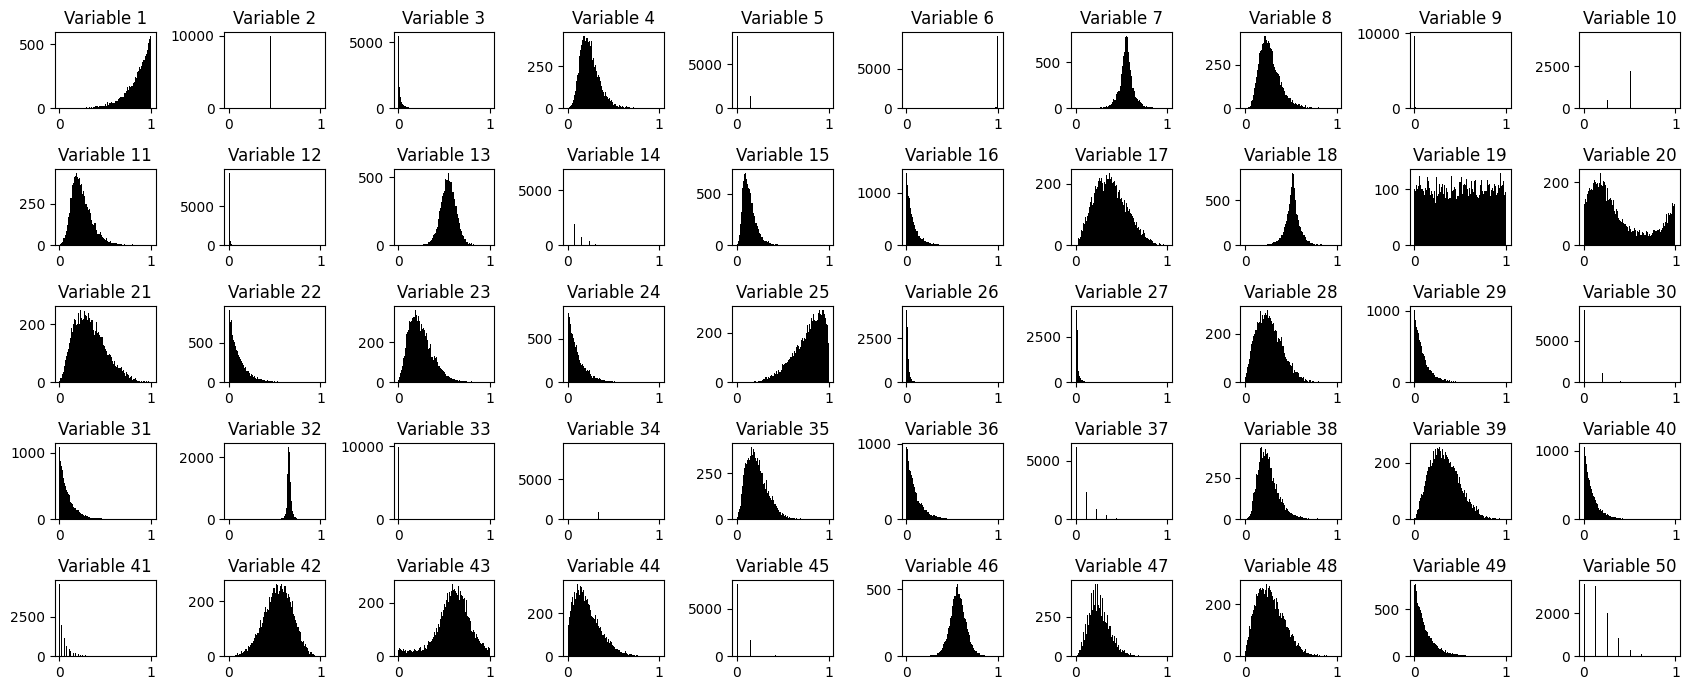

In [ ]:
cols = 10
rows = 5;
variable = 0

fig, axes = plt.subplots(rows, cols)

fig.set_figheight(7)
fig.set_figwidth(17)

for row in range(rows):
  for col in range(cols):
    axes[row][col].hist(dataset.iloc[:, variable], bins=100, color="black")
    axes[row][col].title.set_text("Variable " + str(variable + 1))
    variable += 1

plt.tight_layout()
plt.savefig("synthetic_dataset.pdf", dpi=1000)
plt.show()


In [ ]:
!python --version

Python 3.10.12
